## REGRESION LINEAL PARA PREDECIR LA LONGITUD DEL SEPALO EN FUNCION DE LA ANCHURA DEL PETALO

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [72]:
import tensorflow as tf
session = tf.Session()

## carga y manipulacion de datos

In [73]:
iris = datasets.load_iris()

In [74]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

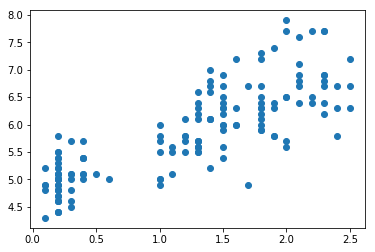

In [75]:
plt.plot(x_vals, y_vals, "o", label="Datos") ##los datos tienen cierta tendencia lineal
plt.show()

## se declaran los placeholders

In [76]:
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)

## se declaran las variables

In [77]:
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

## se define el batch_size

In [78]:
batch_size = 25

## creacion del modelo
    y = Ax + b

In [79]:
prediccion = tf.add(tf.matmul(x_data, A), b)

## funcion de perdidas

In [80]:
loss = tf.reduce_mean(tf.square(y_target-prediccion))

## se define el optimizador con propagacion hacia atras

In [81]:
optimizador = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_step = optimizador.minimize(loss)

## inicializar las variables

In [82]:
init = tf.global_variables_initializer()
session.run(init)

## entrenamiento del modelo

In [83]:
loss_vect = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y}) ##loss temporales
    loss_vect.append(temp_loss)
    if(i+1)%10==0:
        print("paso= "+str(i+1)+ "A=" +str(session.run(A))+" b="+str(session.run(b))+ "loss= "+str(temp_loss))

paso= 10A=[[1.9340675]] b=[[2.9346843]]loss= 0.7128513
paso= 20A=[[1.9065876]] b=[[3.3089046]]loss= 0.61102074
paso= 30A=[[1.6870072]] b=[[3.567393]]loss= 0.68048006
paso= 40A=[[1.5319909]] b=[[3.8101408]]loss= 0.45304886
paso= 50A=[[1.4414663]] b=[[4.002667]]loss= 0.48593396
paso= 60A=[[1.3679116]] b=[[4.1599703]]loss= 0.33772457
paso= 70A=[[1.2543113]] b=[[4.2946577]]loss= 0.35376698
paso= 80A=[[1.1706915]] b=[[4.3539805]]loss= 0.21827632
paso= 90A=[[1.1368868]] b=[[4.444227]]loss= 0.2475927
paso= 100A=[[1.1067163]] b=[[4.5116115]]loss= 0.2618268


In [84]:
## se obtienen los valores de "A" y de "b"
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

## el modelo lineal seria este

In [85]:
print(str(slope)+"x + "+str(intercept))

1.1067163x + 4.5116115


## representacion grafica de la prediccion

In [89]:
## recta de regresion de la prediccion
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

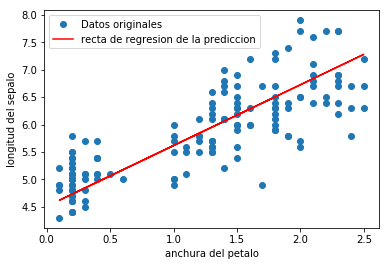

In [90]:
plt.plot(x_vals, y_vals, "o", label="Datos originales")
plt.plot(x_vals, best_fit, "r-", label="recta de regresion de la prediccion")
plt.legend(loc="upper left")
plt.xlabel("anchura del petalo")
plt.ylabel("longitud del sepalo")
plt.show()

## grafico que muestra como fue convergiendo la funcion de perdidas

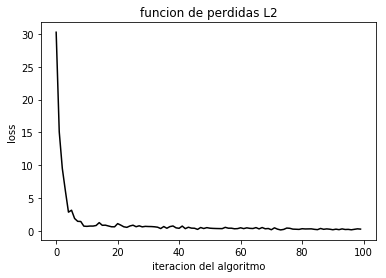

In [88]:
plt.plot(loss_vect, "k-")
plt.title("funcion de perdidas L2")
plt.xlabel("iteracion del algoritmo")
plt.ylabel("loss")
plt.show()